In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Downsample the dataset by reservoir sampling 

In [52]:
def get_data_array(Les_file):
    """
    Take a Lestrade file of genes, expression values, and observations and extract an array of data in preparation
    for use in the reservoir sampling algorithm
    
    Parameters
    ----------
    Les_file : text file 
        text file formatted by Lestrade lab 
        
        
    Returns
    -------
    data_array : numpy array 
        array of the gene expression level values for each genes
    
    """
    #read in txt file 
    with open("{}".format(Les_file), "r") as Lestrade:
        Les_list = Lestrade.readlines()

    Lestrade.close()

    #convert the list generate from reading the lines of text into a numpy array so we can implement the algorithm
    #separate the data lines from the comments lines
    data = []
    comments = []
    for line in Les_list:
        if line.startswith("#"):
            comments.append(line.strip().split())
        else:
            data.append(line.strip().split())
    
    #convert data list to numpy array
    data_array = np.array(data)
    
    return data_array

def get_comments(Les_file):
    """
    Take a Lestrade file of genes, expression values, and observations and extract the comments, which contain the
    observations about each sample for later use. 
    
    Parameters
    ----------
    Les_file : text file 
        text file formatted by Lestrade lab 
        
        
    Returns
    -------
    comments : list of lists
        list of lists of observations and other information from the data file. 
    
    """
    #read in txt file 
    with open("{}".format(Les_file), "r") as Lestrade:
        Les_list = Lestrade.readlines()

    Lestrade.close()

    #convert the list generate from reading the lines of text into a numpy array so we can implement the algorithm
    #separate the data lines from the comments lines
    comments = []
    for line in Les_list:
        if line.startswith("#"):
            comments.append(line.strip().split())
        else:
            continue
    
    return comments

def reservoir_sampling(data_array, m):
    
    """
    Take a random sample of m elements from a array of data by randomly choosing m indices from the data, making 
    a list of randomly chosen indices and extracting them from the data array
    
    Parameters
    ----------
    data_array : numpy array  
        numpy array of expression levels for each gene 
        
    m : int
        number of elements to randomly select
        
    Returns
    -------
    reservoir : list 
        list of the indices of the randomly sampled genes
    
    """
    
    #allocate the reservoir, based on the number of random samples we want to take
    reservoir = [None]*m

    #loop through all the indices of the numpy data array and add one element at a time 
    for i in range(len(data_a)):
        #not inclusive because starting at 0
        if i < m:
            reservoir[i] = i
        else:
            r = np.random.choice(i)
            if r < m:
                reservoir[r] = i
        
    return reservoir

In [53]:
#check to see that the functions work
data_a = get_data_array("w03-data.tbl.txt")
res_idx = reservoir_sampling(data_a, 10)
comments = get_comments("w03-data.tbl.txt")

#reservoir = np.ndarray.tolist(reservoir)
print("Extracted numpy.ndarray of randomly selected genes:","\n", data_a[res_idx], "\n", "\n", "Randomly sampled indices:", "\n", res_idx)

Extracted numpy.ndarray of randomly selected genes: 
 [['KLB' '184.5' '77.5' '82.6' '178.4' '181.8' '185.9' '75.5' '173.1'
  '72.6' '74.9' '58.8' '82.6' '94.8' '138.6' '135.8' '216.0' '152.5'
  '146.4' '113.0' '146.5']
 ['RP5-1021I20.4' '157.3' '100.2' '87.1' '184.8' '191.9' '167.9' '72.4'
  '180.2' '72.8' '69.6' '80.4' '130.2' '131.9' '105.3' '122.9' '137.3'
  '91.9' '153.1' '136.9' '91.0']
 ['TSSK4' '269.8' '163.5' '169.2' '273.2' '269.3' '276.9' '180.8' '266.0'
  '170.9' '180.5' '128.3' '227.4' '269.6' '253.0' '277.6' '232.8' '240.6'
  '287.6' '227.2' '173.1']
 ['KIF17' '161.0' '254.0' '269.3' '180.3' '162.5' '165.4' '259.9' '165.7'
  '286.3' '263.5' '271.5' '203.1' '168.0' '228.1' '301.4' '289.7' '245.6'
  '174.7' '228.9' '290.1']
 ['CD109' '89.3' '207.9' '203.6' '108.9' '95.5' '105.0' '205.5' '115.5'
  '198.0' '200.0' '183.4' '196.1' '235.5' '89.9' '149.7' '198.5' '150.3'
  '250.7' '80.4' '141.8']
 ['LRIG1' '80.0' '168.9' '174.5' '62.4' '49.8' '65.8' '157.6' '61.3'
  '155.8' '154.

## 2. Look at outliers, validate the formatting

In [54]:
#convert data_a to pandas dataframe for manipulation
data_df = pd.DataFrame(data_a)
data_df = data_df.set_index(0)
data_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
anise,153.9,51.9,55.4,150.9,163.8,181.8,65.9,138.4,49.1,60.6,52.8,190.4,70.7,107.1,121.6,103.2,93.0,140.0,160.3,49.7
apricot,268.1,159.1,161.0,250.9,286.4,288.5,168.4,265.8,154.7,190.2,267.2,280.6,257.5,178.8,234.3,237.6,251.8,218.2,270.8,285.2
artichoke,260.7,188.2,170.5,297.8,267.0,273.7,179.6,290.1,191.6,181.6,204.8,259.6,262.8,303.2,349.5,242.3,227.2,203.4,256.4,205.3
arugula,176.4,279.4,286.0,181.5,182.8,184.5,283.1,185.9,286.3,282.0,200.0,316.2,188.3,256.9,166.0,286.4,188.4,240.5,58.8,171.3
asparagus,213.4,99.8,100.9,206.4,193.6,186.3,115.5,197.6,85.1,98.0,143.3,117.6,147.1,91.5,103.3,162.5,182.0,209.4,91.2,132.7


In [55]:
#quickly check return for max values
data_df.max(axis=1).max()

'n.d.'

This result is suspicious because max should return a number, but it appears that since there are strings in place of the expression levels (because there is no data for those genes), the max function chooses the string elements as the maximum gene expression values. Now to find ALL max values in the dataframe...

In [56]:
#Find and print the ALL data lines that contains the maximum expression level.
max_df = data_df[data_df.max(axis=1) == data_df.max(axis=1).max()]

print(max_df, "\n", "Total number of genes with n.d.:", len(max_df))

            1     2     3     4     5     6     7     8     9     10    11  \
0                                                                            
TMEM200B  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.   
GBP3      n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.   
KCNT2     n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.   
PKDCC     n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.   
CKAP2L    n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.   
SESTD1    n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.   
ABI2      n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.   
COLQ      n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.   
PDE6B     n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.   
SLC34A2   n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.   
ARAP2     n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  n.d.  

In [57]:
#Find and print the all the data lines that contains the minimum expression level.
#find ALL "max" values in dataframe
min_df = data_df[data_df.min(axis=1) == data_df.min(axis=1).min()]

print(min_df, "\n", "Total number of genes with negative values:", len(min_df))

               1       2       3       4       5       6       7       8   \
0                                                                           
MOB3C      -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0   
LHX9       -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0   
OR2T12     -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0   
PLB1       -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0   
C2orf78    -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0   
TMEM108    -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0   
RRH        -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0   
SORBS2     -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0   
MTX3       -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0   
TMEM185A   -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0   
RAB39B     -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0  -999.0   

In all, I have identified 59 genes with values that are not "right", based on their output from the max and min functions. I will now go ahead and remove these genes from the dataset. 

## 3. Clean the data

In [58]:
#drop both the max and min dataframes from the data dataframe
data_clean = data_df.drop(min_df.index).drop(max_df.index)
#data_df.loc[:,1:20].apply(pd.to_numeric, errors = 'coerce')
data_clean = data_clean.apply(pd.to_numeric, errors = 'coerce')
print("DataFrame size with removed n.d. and -0.999:", len(data_clean))

DataFrame size with removed n.d. and -0.999: 19972


In [59]:
data_clean_min = data_clean[data_clean.min(axis=1) == data_clean.min(axis=1).min()]
data_clean_max = data_clean[data_clean.max(axis=1) == data_clean.max(axis=1).max()]

In [60]:
print(data_clean_min.head(),"\n", "Size of new min dataframe:",len(data_clean_min))

              1      2      3      4      5      6      7      8      9   \
0                                                                          
coriander  155.6  249.9  258.9  147.4  158.7  137.4  252.4  156.7  253.6   
scallion   167.5   72.4   56.4  167.8  149.1  160.7   69.3  158.1   52.2   
FNDC10     193.0  109.9   91.8  207.1  191.9  206.3  106.2  197.7  109.1   
HES5       160.7   55.8   58.1  147.0  161.3  170.5   50.5  158.2   64.3   
NPHP4      155.6   49.7   62.2  151.6  157.1  157.2   53.5  157.5   52.4   

              10     11     12     13     14     15     16     17     18  \
0                                                                          
coriander  252.1    0.1    0.0    0.1    0.1    0.0    0.1    0.1    0.1   
scallion    61.8    0.0   26.4  102.1  110.8  113.0   58.1   77.5  114.0   
FNDC10     107.8   57.0  121.8  154.2  109.7  235.8  143.9    0.0  183.2   
HES5        58.9  108.5  102.6  152.6  110.7  155.3   98.2  143.2  133.7   
NPHP4      

All the "minimum" values here are genes which have some level of expression of 0 in any of the subjects

In [61]:
print(data_clean_max,"\n", "Size of new max dataframe:", len(data_clean_max))

               1      2      3      4      5      6      7      8      9   \
0                                                                           
AC087762.1  288.2  165.7  183.1  313.5  288.4  278.7  184.3  271.9  200.7   

               10     11     12     13     14     15     16     17     18  \
0                                                                           
AC087762.1  182.6  170.8  441.7  283.6  384.5  323.0  270.2  209.0  281.6   

               19     20  
0                         
AC087762.1  315.9  333.4   
 Size of new max dataframe: 1


## 4. Tidy the data 

In [62]:
#need to find the comments with info for the data and manipulate to describe genes
#need to transpose rows and add the sex and mt v wt as column values
#header with gene name and add in as a row the WT v. Mut and the Female or Male 
wt_mut = comments[3]
wt_mut[0] = 'Genotype'

sex = comments[4][1:]
sex[0] = 'Sex'

genes = list(data_clean.index)

#Add list from list of lists provided of the sex and genotype information to the 
#datatable by inserting the lists as rows
data_clean_tidy = pd.DataFrame([sex, wt_mut]).set_index(0)
data_clean_tidy = data_clean_tidy.append(data_clean)
data_clean_tidy = data_clean_tidy.transpose()
data_clean_tidy.to_csv("w03-data_clean_tidy_wide_HC.tsv", sep ="\t", index=False)

#make the data even "tidier" 
data_clean_tidy_long = pd.melt(data_clean_tidy, id_vars=['Sex', 'Genotype'], value_vars=genes, var_name='Gene name', value_name='Expression level')
data_clean_tidy_long.to_csv("w03-data_clean_tidy_long_HC.tsv", sep ="\t", index=False)

In [63]:
data_clean_tidy.head()

,Sex,Genotype,anise,apricot,artichoke,arugula,asparagus,avocado,banana,basil,...,AC007325.4,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1
1,M,wt,153.9,268.1,260.7,176.4,213.4,222.4,145.1,280.2,...,111.8,159.1,185,175.4,175.2,139.2,262,194.8,258.9,230.6
2,F,wt,51.9,159.1,188.2,279.4,99.8,137.7,58.9,187.4,...,211.1,270.8,272.4,272.8,76.1,224.6,183.7,302.4,158.1,125.4
3,F,wt,55.4,161,170.5,286,100.9,152.8,36.9,178,...,206.6,258.4,281.3,277.9,75.3,240.9,176.3,315.7,148.8,120.1
4,M,wt,150.9,250.9,297.8,181.5,206.4,249.2,158.4,283.2,...,112.2,171,176.1,177.3,169.7,149.9,273.7,200.7,246.3,230.8
5,M,wt,163.8,286.4,267,182.8,193.6,222.7,153.9,274.9,...,118,163,173.3,169,177.1,121.2,273,188.4,253.8,231.4


In [64]:
data_clean_tidy_long.head()

,Sex,Genotype,Gene name,Expression level
0,M,wt,anise,153.9
1,F,wt,anise,51.9
2,F,wt,anise,55.4
3,M,wt,anise,150.9
4,M,wt,anise,163.8


## 5. Visualize the data using the random sampling algorithm 

In [65]:
#use function to pull random indices from dataset once more
reservoir_idx = reservoir_sampling("w03-data.tbl.txt", 10)
#choose 10 random genes from the dataset
sample_data = data_clean_tidy.iloc[:,[0,1]+reservoir_idx]

In [66]:
#separate data by replicate
data_res = pd.melt(sample_data, id_vars=['Genotype', 'Sex'], var_name="Gene", value_name="TPM")
uni_gene = data_res['Gene'].unique()
print("Randomly sampled genes:","\n", list(uni_gene))

Randomly sampled genes: 
 ['WDR36', 'TEX43', 'NPY', 'TMEM160', 'CT45A1', 'WDR43', 'ADH6', 'SPACA3', 'LYSMD4', 'AC138517.6']


### Visualize all gene data on one plot 

Text(0.5,1,"Randomly sampled genes ['WDR36', 'TEX43', 'NPY', 'TMEM160', 'CT45A1', 'WDR43', 'ADH6', 'SPACA3', 'LYSMD4', 'AC138517.6']")

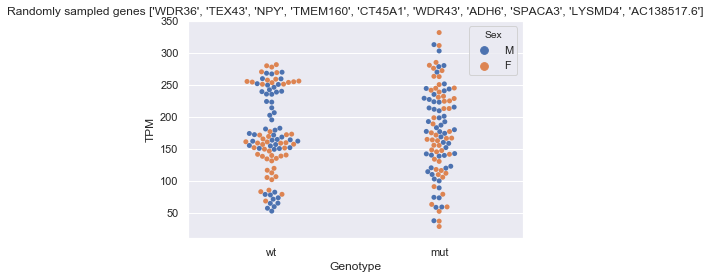

In [67]:
#visualize all genes in one plot
#sns.set(style="whitegrid")
sns.set(font_scale=1)
sns.swarmplot(x='Genotype', y='TPM', hue='Sex', data=data_res.loc[data_res['Gene'].isin(uni_gene)]).set_title('Randomly sampled genes {}'.format([gene for gene in uni_gene]))

Text(0.5,1,"Randomly sampled genes ['WDR36', 'TEX43', 'NPY', 'TMEM160', 'CT45A1', 'WDR43', 'ADH6', 'SPACA3', 'LYSMD4', 'AC138517.6']")

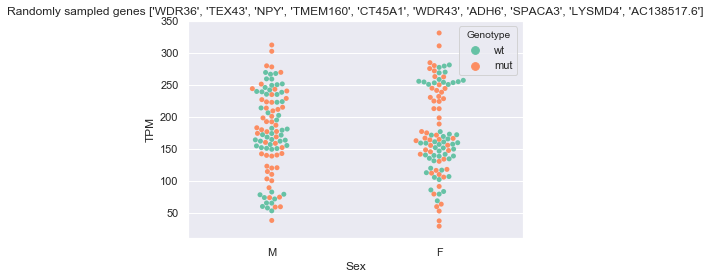

In [82]:
#visualize all genes in one plot
#sns.set(style="whitegrid")
sns.set(font_scale=1)
sns.swarmplot(x='Sex', y='TPM', hue='Genotype', data=data_res.loc[data_res['Gene'].isin(uni_gene)], palette='Set2').set_title('Randomly sampled genes {}'.format([gene for gene in uni_gene]))

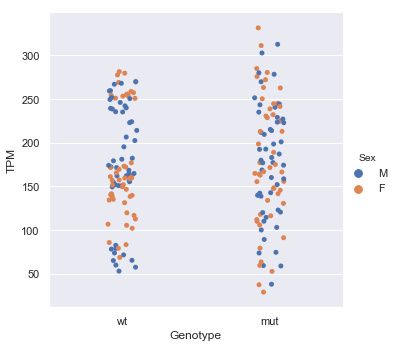

In [68]:
#try catplot
sns.set(font_scale=1)
sns.catplot(x='Genotype', y='TPM', hue='Sex', data=data_res.loc[data_res['Gene'].isin(uni_gene)])

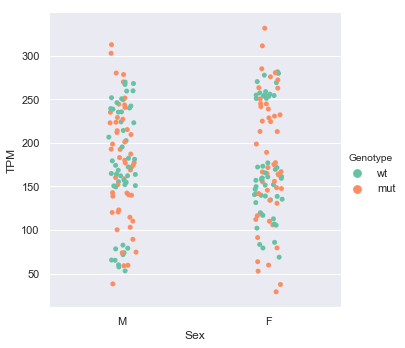

In [78]:
#try catplot
sns.set(font_scale=1)
sns.catplot(x='Sex', y='TPM', hue='Genotype', data=data_res.loc[data_res['Gene'].isin(uni_gene)], palette='Set2')

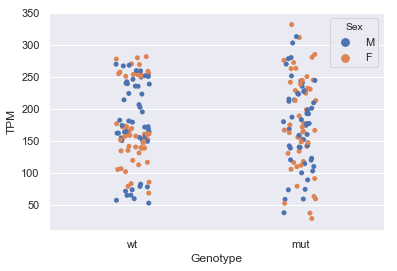

In [69]:
#try stripplot
sns.set(font_scale=1)
sns.stripplot(x='Genotype', y='TPM', hue='Sex', data=data_res.loc[data_res['Gene'].isin(uni_gene)], jitter=True)

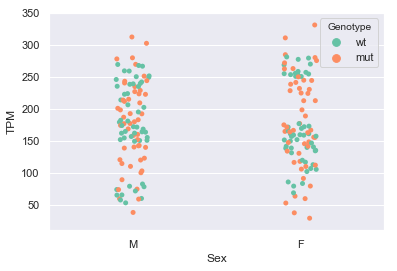

In [77]:
#try stripplot
sns.set(font_scale=1)
sns.stripplot(x='Sex', y='TPM', hue='Genotype', data=data_res.loc[data_res['Gene'].isin(uni_gene)], palette='Set2', jitter=True)

There seems to be clustering of expression within each sex in the wild-type samples but not in the mutant samples (seems more spread out), but it is difficult to tell looking at all of the genes at once. 

### Visualize genes one by one 

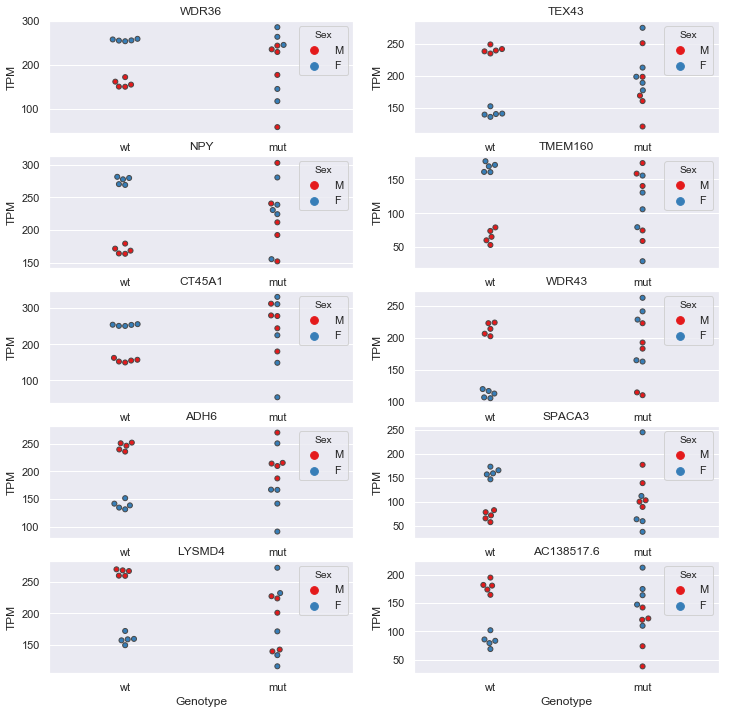

In [70]:
#visualize with swarmplot
sns.set(style="whitegrid")
sns.set(font_scale=1)
data_res['TPM'] = data_res['TPM'].astype(float)
f, ax = plt.subplots(figsize = (12,12))
for i, gene in enumerate(uni_gene):
    #print(data.loc[data['Gene'] == gene])
    ax1= plt.subplot(5, 2, i+1)
    sns.swarmplot(x='Genotype', y='TPM', hue='Sex', data=data_res.loc[data_res['Gene'] == gene], linewidth=1, palette="Set1")
    ax1.set_title(gene)

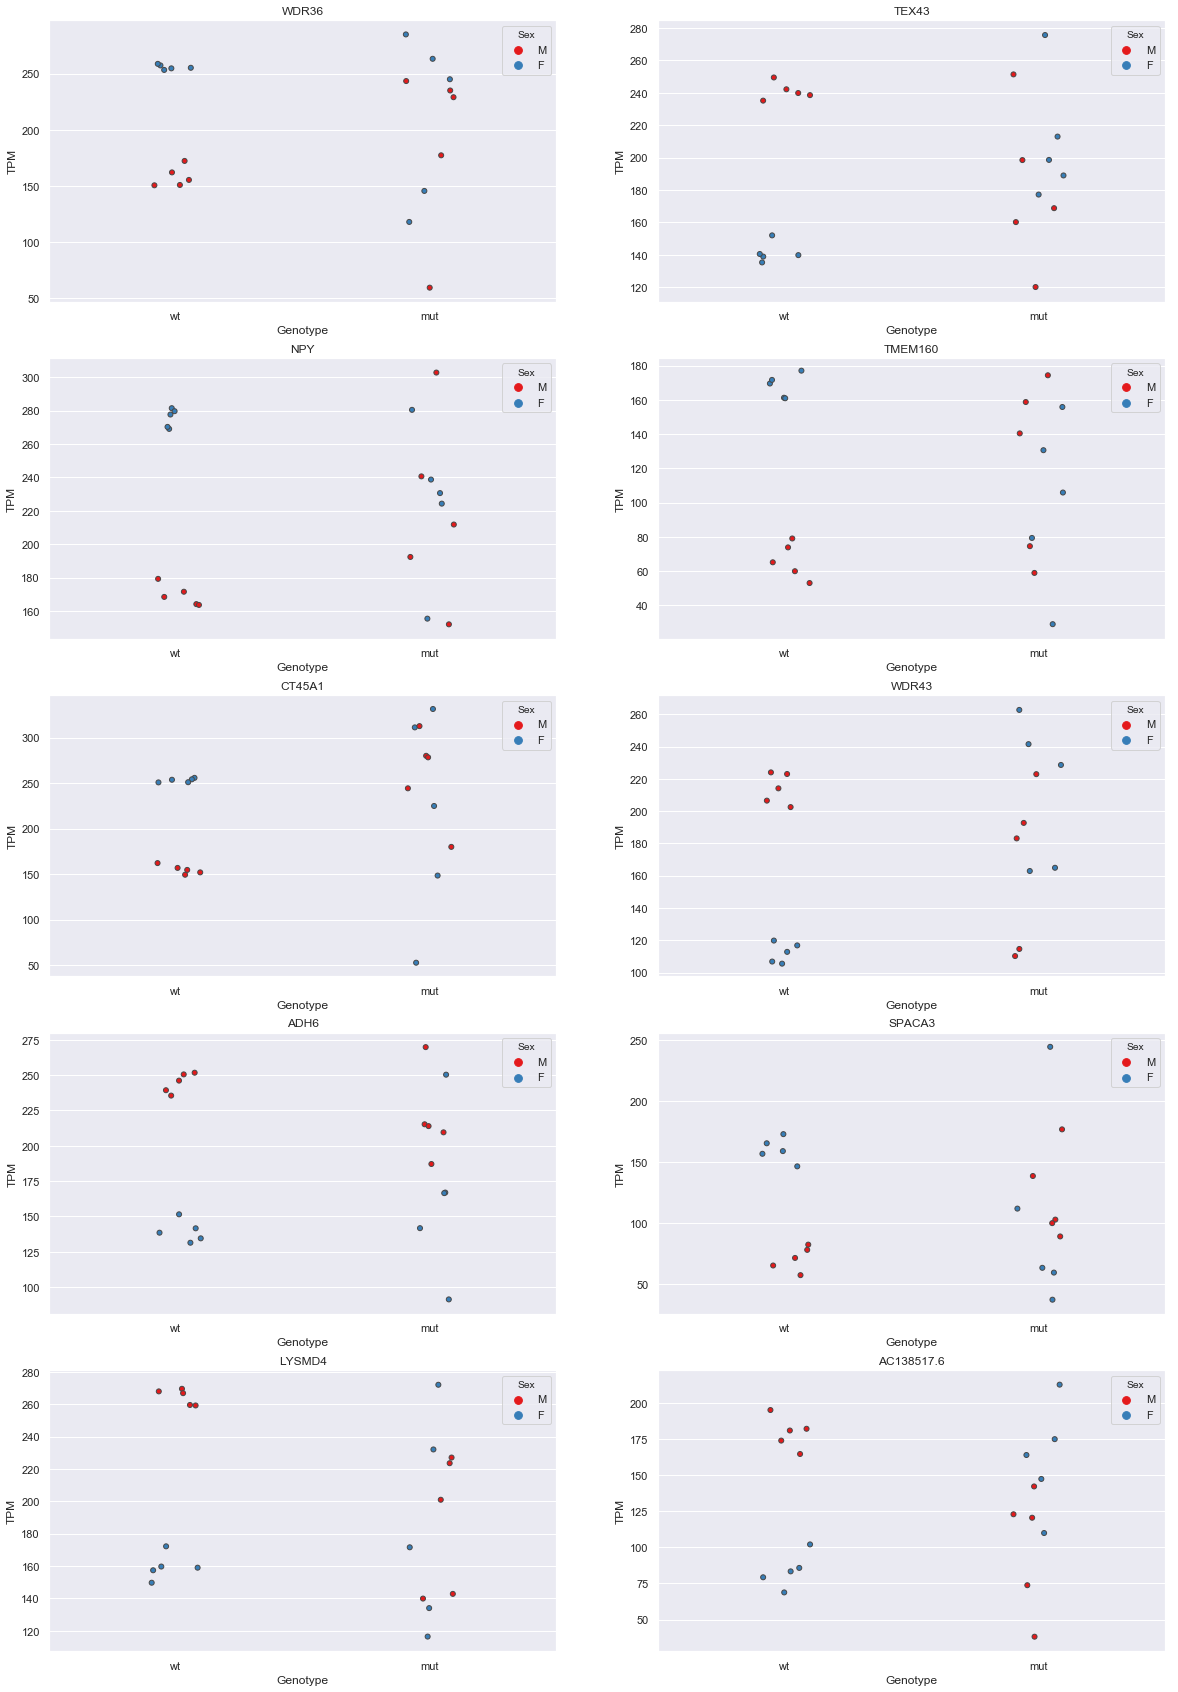

In [71]:
#visualize with strippplot and boxplot simultaneously or one by one by commenting each out
#sns.set(style="whitegrid")
sns.set(font_scale=1)
data_res['TPM'] = data_res['TPM'].astype(float)
f, ax = plt.subplots(figsize = (20,30))
for i, gene in enumerate(uni_gene):
    #print(data.loc[data['Gene'] == gene])
    ax1= plt.subplot(5, 2, i+1)
    sns.stripplot(x='Genotype', y='TPM', hue='Sex', data=data_res.loc[data_res['Gene'] == gene], linewidth=1, palette="Set1", jitter=True)
    #try boxplot if you want
    #sns.boxplot(y='Genotype', x='TPM', hue='Sex', data=data_res.loc[data_res['Gene'] == gene], palette="Set1", whis=np.inf)
    ax1.set_title(gene)

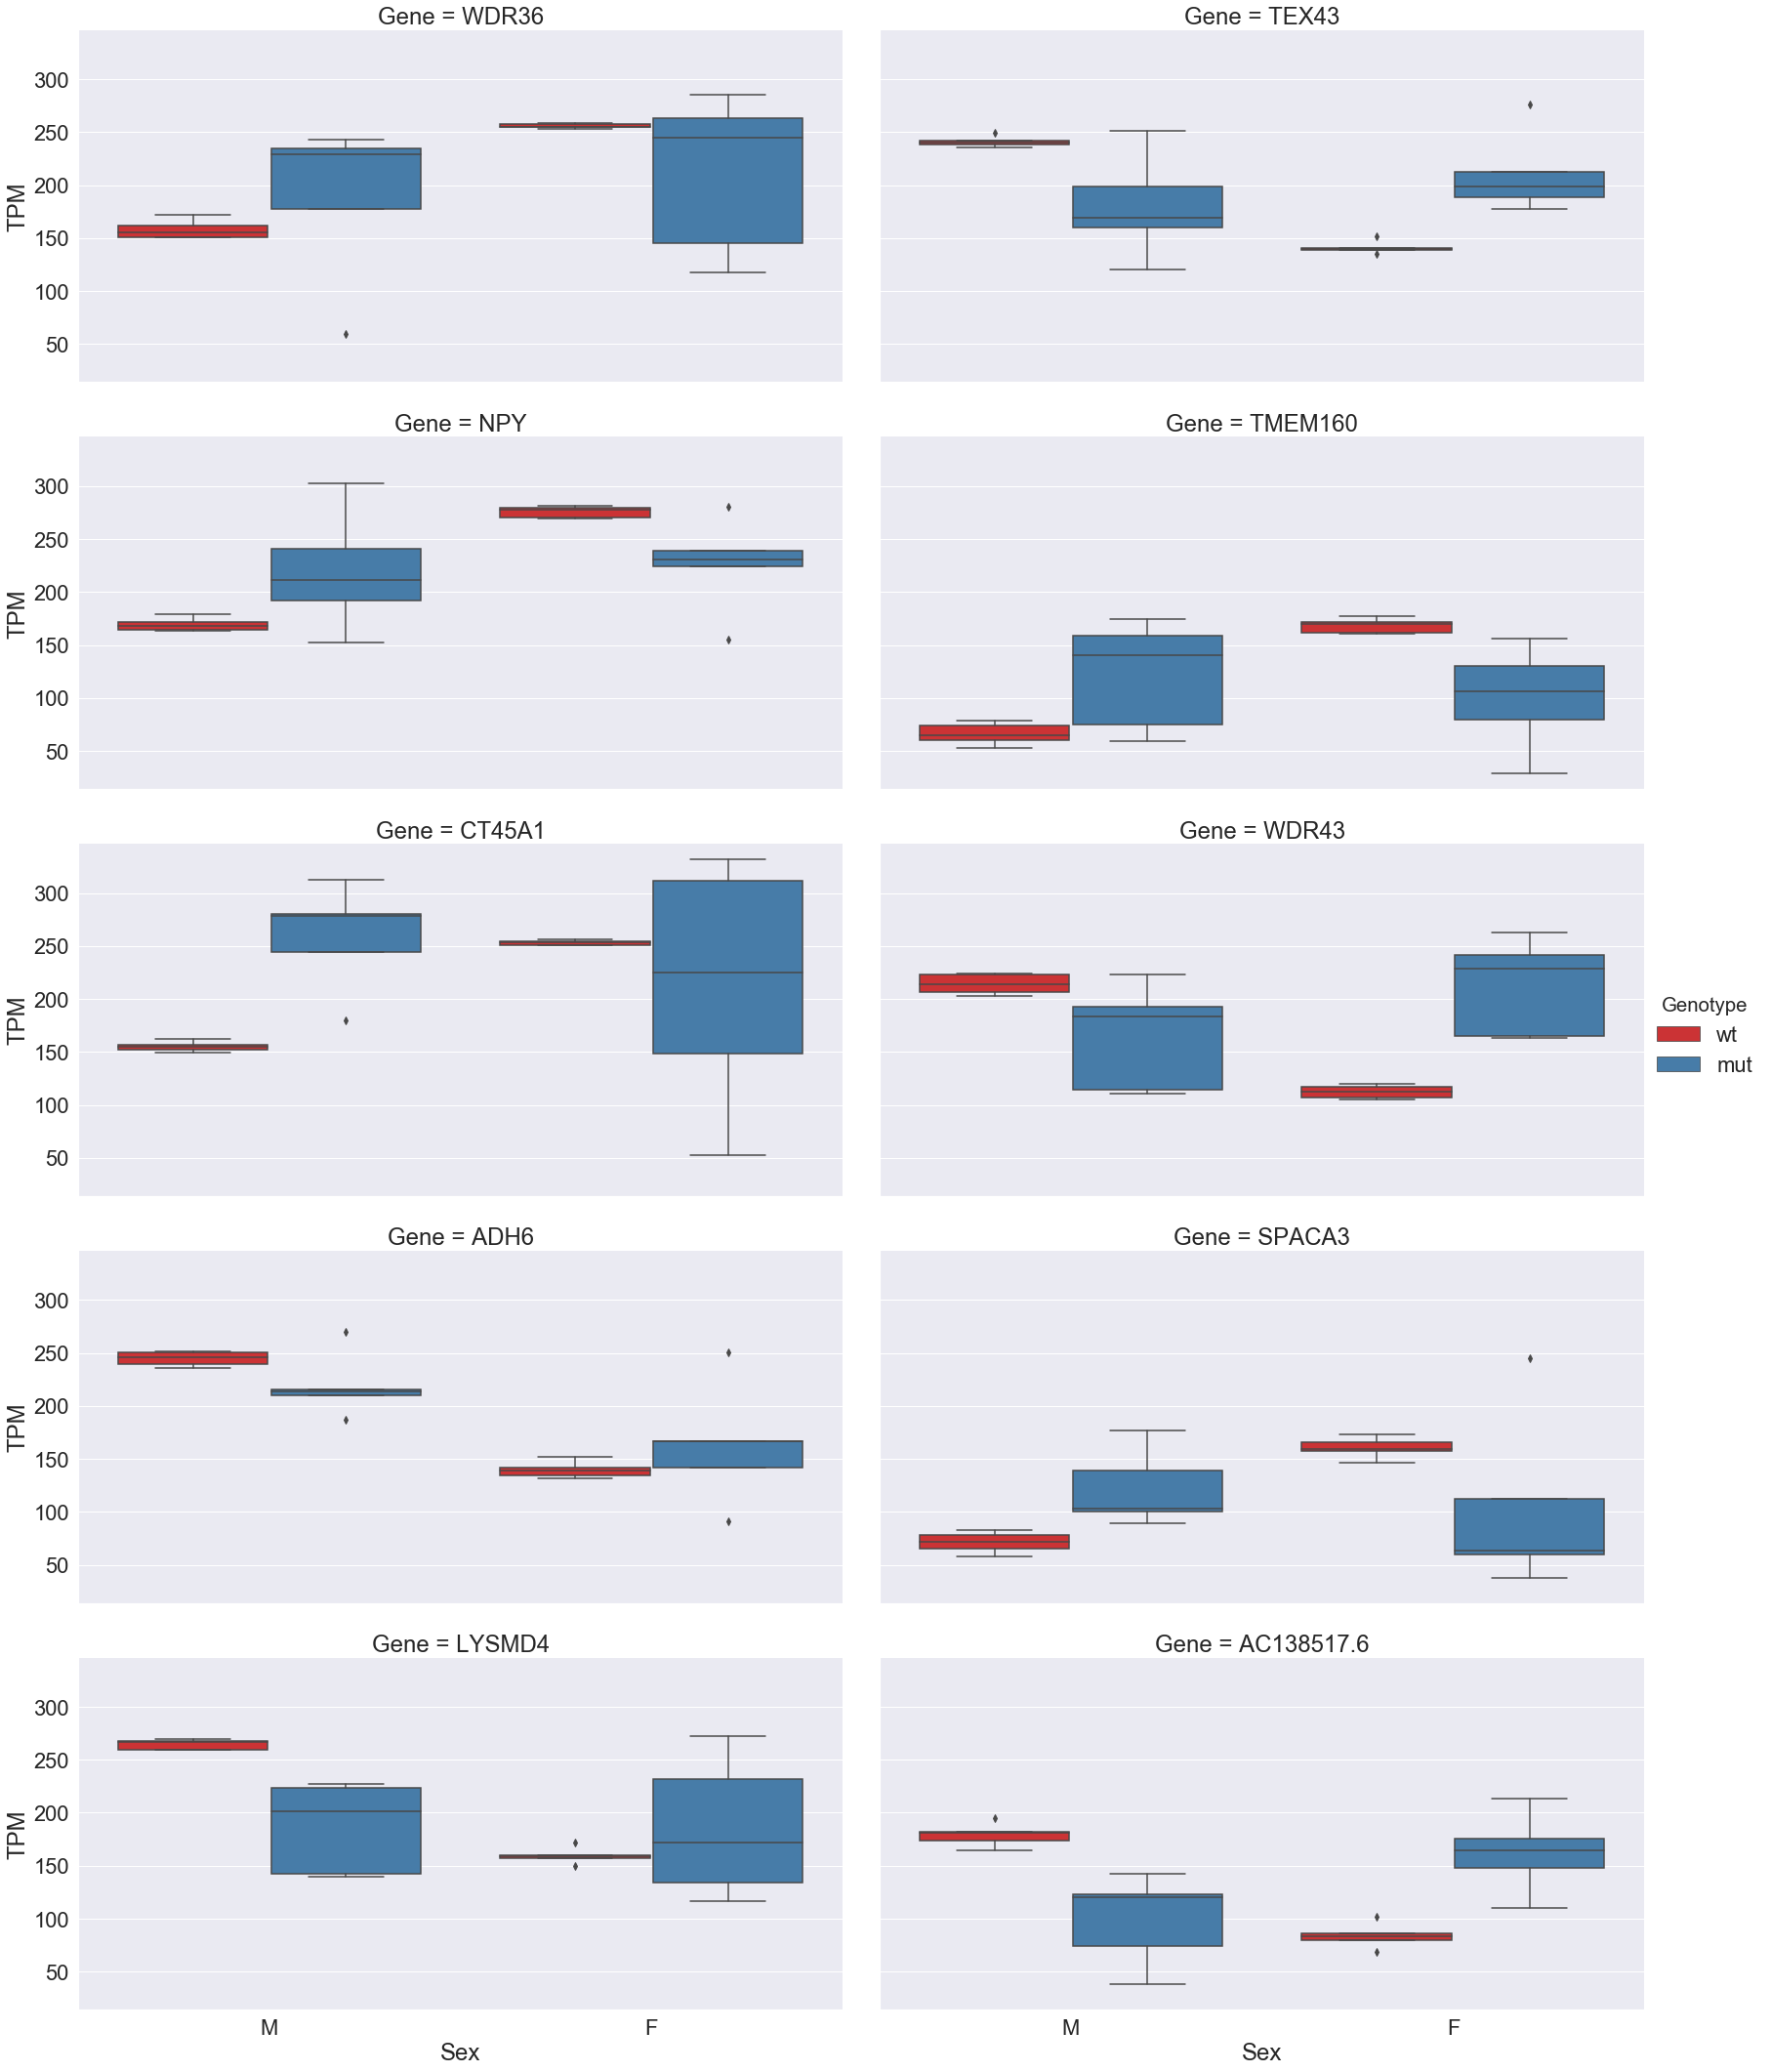

In [73]:
#visualize with catplot
sns.set(font_scale=2)
data_res['TPM'] = data_res['TPM'].astype(float)
g = sns.catplot(x='Sex', y='TPM', hue='Genotype', col='Gene', data=data_res, palette="Set1", kind="box", col_wrap=2, 
                height=6, aspect=2, dodge=True, legend_out=True)

## 6. Conclusion: The coriander phenotype

The coriander gene seems to regulate expression levels of each of the genes sample, such that when comparing the TPM levels between the wt and mutant phenotypes of the coriander gene within each sex, it is clear that the TPMs become more variable in the mutant phenotype for both sexes. The coriander gene thus regulates how variable the expression of genes are, and the mutant coriander gene is unable to maintain a tight regulation of transcript level of each gene. 